<a href="https://colab.research.google.com/github/jmontero23/SenalesySistemas/blob/main/Proyecto_Final/Resumen_Conceptos_Clave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resumen de Conceptos Clave para Comunicaciones Inalámbricas**

---

## **1. Transformada de Fourier (FT, DFT, FFT)**

La Transformada de Fourier es una herramienta matemática que descompone una señal en sus frecuencias constituyentes. Permite pasar del dominio del tiempo, donde vemos la amplitud de la señal a lo largo del tiempo, al **dominio de la frecuencia**, donde vemos cuánta energía tiene la señal en cada frecuencia. Es fundamental para analizar el contenido espectral de las señales de información.

#### **Modelo Matemático**

* **Transformada de Fourier (FT) para señales continuas:**
  Se aplica a señales continuas y aperiódicas. La transformada $X(f)$ de una señal $x(t)$ se define como:
  $
  X(f) = \int_{-\infty}^{\infty} x(t) e^{-j2\pi ft} dt
  $
    Donde:
    * $x(t)$ es la señal en el dominio del tiempo.
    * $X(f)$ es la representación de la señal en el dominio de la frecuencia.
    * $f$ es la frecuencia en Hertz.
    * $j$ es la unidad imaginaria.
    * $e^{-j2\pi ft}$ es el núcleo de la transformada, una exponencial compleja que representa una onda sinusoidal con fase y amplitud. La integral descompone $x(t)$ en una suma infinita de estas exponenciales.

* **Transformada Discreta de Fourier (DFT) para señales digitales:**
    En el mundo digital, trabajamos con muestras de una señal. La DFT se usa para encontrar el espectro de una secuencia finita de muestras .
    $$
    X[k] = \sum_{n=0}^{N-1} x[n] e^{-j\frac{2\pi}{N}kn}
    $$
    Donde:
    * $x[n]$ es la secuencia de $N$ muestras de la señal en el tiempo ($n=0, 1, ..., N-1$).
    * $X[k]$ es el k-ésimo coeficiente de frecuencia ($k=0, 1, ..., N-1$), que representa la amplitud y fase de la frecuencia $k \cdot f_s/N$, donde $f_s$ es la frecuencia de muestreo.
    * $N$ es el número total de muestras **(Proakis & Manolakis, 2007)**.

* **Transformada Rápida de Fourier (FFT):**
    No es una transformada nueva, sino un **algoritmo altamente eficiente** para calcular la DFT. Reduce drásticamente la complejidad computacional de $O(N^2)$ a $O(N \log N)$, haciendo posible el análisis espectral en tiempo real, lo cual es crucial para tecnologías como 5G y WiFi.

#### **Usos Principales**
* **Análisis Espectral:** Ver el ancho de banda que ocupa una señal y detectar interferencias.
* **Filtrado:** Diseñar filtros en el dominio de la frecuencia es a menudo más intuitivo que en el tiempo.
* **Modulación y Demodulación:** Es la base para técnicas como OFDM, donde los datos se transmiten en diferentes subportadoras de frecuencia.

#### **Gráficos**

---

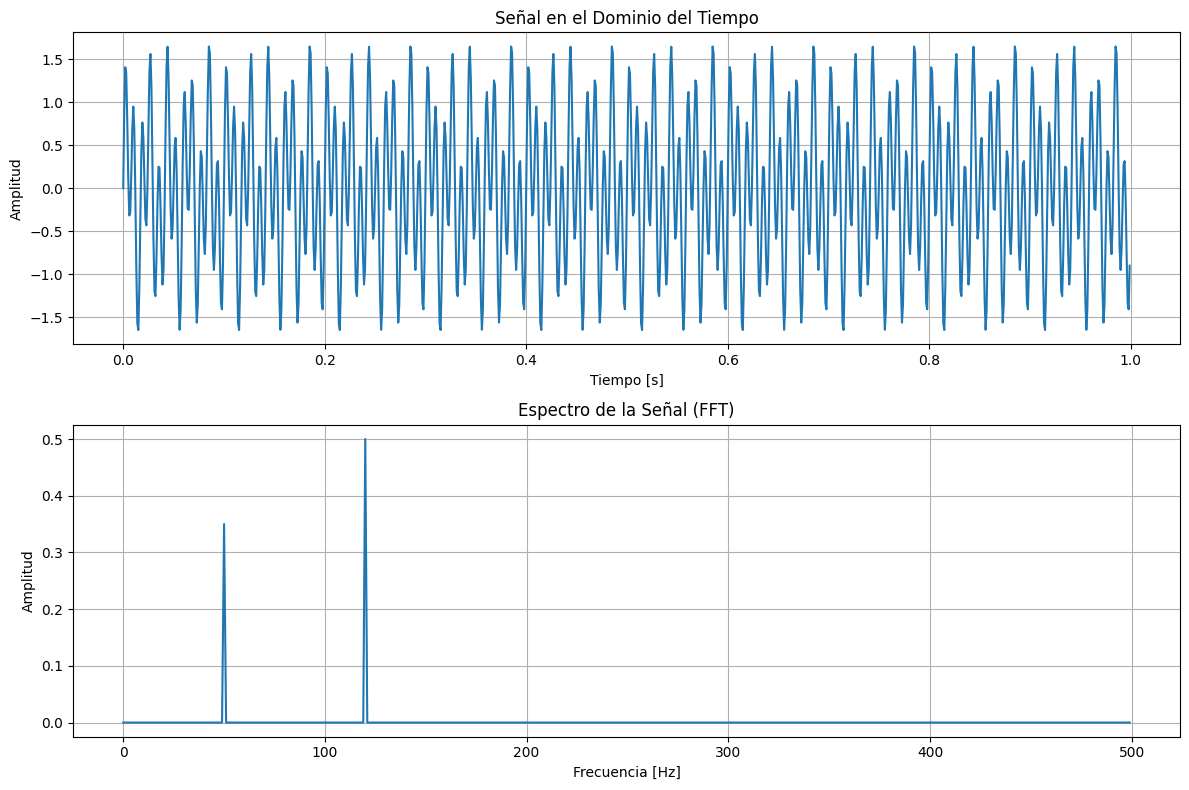

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 1000  # Frecuencia de muestreo
t = np.arange(0, 1, 1/fs) # Vector de tiempo de 1 segundo

# Crear una señal con dos frecuencias: 50 Hz y 120 Hz
s = 0.7 * np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Calcular la FFT
Y = np.fft.fft(s)
N = len(Y)
freq = np.fft.fftfreq(N, 1/fs)

# Graficar
plt.figure(figsize=(12, 8))

# Panel Superior: Dominio del Tiempo
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title("Señal en el Dominio del Tiempo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

# Panel Inferior: Dominio de la Frecuencia
plt.subplot(2, 1, 2)
plt.plot(freq[:N // 2], np.abs(Y)[:N // 2] * 1/N) # Graficar la mitad del espectro
plt.title("Espectro de la Señal (FFT)")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()

#### **Simulaciones**
---

In [12]:
# Importa las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

# Define la función principal para la simulación
def simulate_fft(frecuencia=77, nivel_ruido=0.3):
    # Define la frecuencia de muestreo
    fs = 1000
    # Crea el vector de tiempo
    t = np.arange(0, 1, 1/fs)
    # Genera una señal sinusoidal con ruido
    signal = np.sin(2 * np.pi * frecuencia * t) + nivel_ruido * np.random.randn(len(t))

    # Calcula la Transformada Rápida de Fourier
    fft_result = np.fft.fft(signal)
    # Obtiene el número de muestras
    N = len(fft_result)
    # Calcula el vector de frecuencias
    freqs = np.fft.fftfreq(N, 1/fs)

    # Encuentra el índice de la frecuencia con mayor magnitud
    max_magnitude_index = np.argmax(np.abs(fft_result[1:N//2])) + 1
    # Obtiene el valor de la frecuencia detectada
    frecuencia_detectada = freqs[max_magnitude_index]

    # Configura y muestra el gráfico
    plt.figure(figsize=(10, 5))
    # Dibuja el espectro de la señal
    plt.plot(freqs[1:N//2], np.abs(fft_result[1:N//2]))
    # Añade un título al gráfico
    plt.title(f"Frecuencia Dominante Detectada: {frecuencia_detectada:.2f} Hz")
    # Etiqueta el eje X
    plt.xlabel("Frecuencia (Hz)")
    # Etiqueta el eje Y
    plt.ylabel("Magnitud")
    # Dibuja una línea vertical en la frecuencia detectada
    plt.axvline(frecuencia_detectada, color='r', linestyle='--')
    # Activa la cuadrícula
    plt.grid(True)
    # Muestra el gráfico
    plt.show()

# Crea un objeto interactivo para la función
interactive_plot = interactive(simulate_fft,
                               # Define un deslizador para el parámetro 'frecuencia'
                               frecuencia=widgets.IntSlider(min=10, max=200, step=1, value=77, description='Frecuencia:'),
                               # Define un deslizador para el parámetro 'nivel_ruido'
                               nivel_ruido=widgets.FloatSlider(min=0, max=2.0, step=0.1, value=0.3, description='Ruido:'))
# Muestra los controles interactivos y el gráfico
display(interactive_plot)

interactive(children=(IntSlider(value=77, description='Frecuencia:', max=200, min=10), FloatSlider(value=0.3, …

## **2. Filtrado Digital (FIR/IIR)**

Un filtro digital es un sistema que realiza una operación matemática sobre una señal muestreada para atenuar o realzar ciertos aspectos de esa señal. Su objetivo principal es **seleccionar o limpiar señales**, por ejemplo, eliminando ruido o separando canales de comunicación.

#### **Modelo Matemático**

Los filtros se clasifican principalmente en dos tipos:

* **Filtros de Respuesta Finita al Impulso (FIR):**
  La salida de un filtro FIR es una suma ponderada de las entradas actuales y pasadas. No tienen retroalimentación.
  $
  y[n] = \sum_{k=0}^{M} b_k x[n-k]
  $
  
  Donde:
    * $y[n]$ es la muestra de salida en el instante $n$.
    * $x[n]$ es la muestra de entrada en el instante $n$.
    * $b_k$ son los coeficientes del filtro, que definen su respuesta.
    * $M$ es el orden del filtro.
    * **Características:** Siempre son estables y pueden diseñarse para tener fase lineal, lo que es vital para no distorsionar las señales de datos.

* **Filtros de Respuesta Infinita al Impulso (IIR):**
    La salida de un filtro IIR depende de las entradas actuales y pasadas, y también de las **salidas pasadas** (retroalimentación).
    $$
    y[n] = \sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{L} a_k y[n-k]
    $$
    Donde:
    * $y[n], x[n], b_k$ son como en el filtro FIR.
    * $a_k$ son los coeficientes de la retroalimentación.
    * $y[n-k]$ son las salidas anteriores **(Oppenheim & Schafer, 2009)**.
    * **Características:** Son computacionalmente más eficientes que los FIR para lograr una misma selectividad de frecuencia, pero pueden ser inestables si no se diseñan correctamente y no suelen tener fase lineal.

#### **Usos Principales**
* **Eliminación de Ruido:** Usar un filtro paso-bajo para eliminar ruido de alta frecuencia de una señal.
* **Selección de Canal:** Usar un filtro paso-banda para aislar la banda de frecuencia de un canal de WiFi específico.
* **Ecualización:** Compensar las distorsiones introducidas por el canal de comunicación.

---

#### **Gráficos**

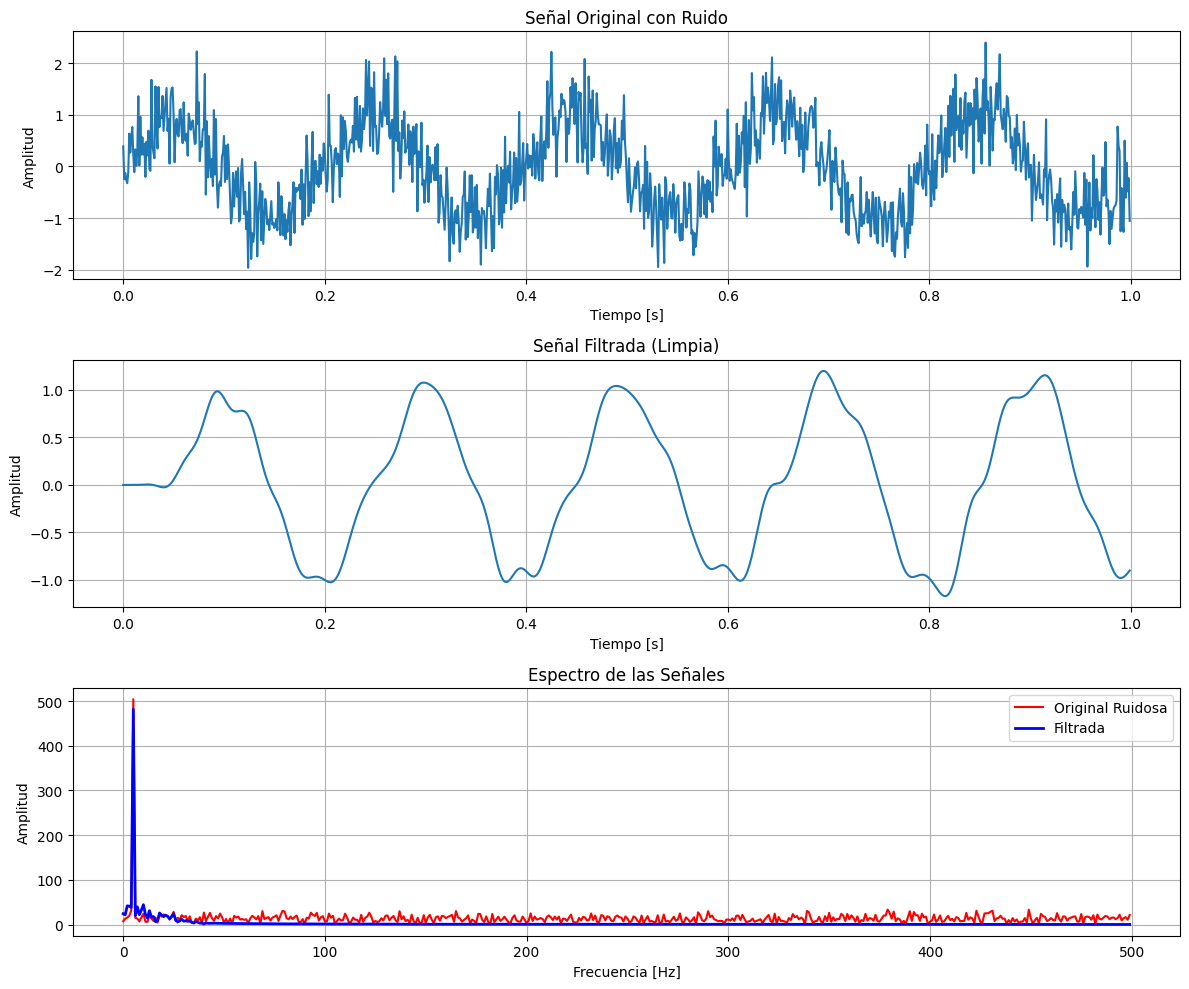

In [3]:
from scipy.signal import firwin, lfilter

# Parámetros
fs = 1000
t = np.arange(0, 1, 1/fs)
f_signal = 5  # Frecuencia de la señal útil
cutoff_freq = 30 # Frecuencia de corte del filtro

# Crear señal con ruido
signal = np.sin(2 * np.pi * f_signal * t)
noise = 0.5 * np.random.randn(len(t))
noisy_signal = signal + noise

# Diseñar un filtro FIR paso-bajo
num_taps = 101 # Orden del filtro
b = firwin(num_taps, cutoff_freq, fs=fs, pass_zero='lowpass')

# Aplicar el filtro
filtered_signal = lfilter(b, 1.0, noisy_signal)

# Graficar
plt.figure(figsize=(12, 10))

# Señal Original Ruidosa
plt.subplot(3, 1, 1)
plt.plot(t, noisy_signal)
plt.title("Señal Original con Ruido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

# Señal Filtrada
plt.subplot(3, 1, 2)
plt.plot(t, filtered_signal)
plt.title("Señal Filtrada (Limpia)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)

# Espectro de ambas señales
Y_noisy = np.fft.fft(noisy_signal)
Y_filtered = np.fft.fft(filtered_signal)
N = len(Y_noisy)
freq = np.fft.fftfreq(N, 1/fs)

plt.subplot(3, 1, 3)
plt.plot(freq[:N//2], np.abs(Y_noisy)[:N//2], 'r', label='Original Ruidosa')
plt.plot(freq[:N//2], np.abs(Y_filtered)[:N//2], 'b', linewidth=2, label='Filtrada')
plt.title("Espectro de las Señales")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### **Simulaciones**
---

In [4]:
# Importa funciones para el diseño y aplicación de filtros
from scipy.signal import firwin, lfilter

# Define la función para la simulación interactiva de filtrado
def simulate_filtering(f_interferencia=400, f_corte=100):
    # Define la frecuencia de muestreo
    fs = 2000
    # Crea el vector de tiempo
    t = np.arange(0, 1, 1/fs)
    # Genera la señal útil de baja frecuencia
    signal_util = np.sin(2 * np.pi * 30 * t)
    # Genera la señal de interferencia de alta frecuencia
    interferencia = 0.5 * np.sin(2 * np.pi * f_interferencia * t)
    # Combina la señal útil con la interferencia
    signal_con_interferencia = signal_util + interferencia

    # Diseña un filtro digital FIR paso-bajo
    filtro = firwin(151, f_corte, fs=fs, pass_zero='lowpass')
    # Aplica el filtro a la señal con interferencia
    signal_filtrada = lfilter(filtro, 1.0, signal_con_interferencia)

    # Configura el tamaño del gráfico
    plt.figure(figsize=(12, 8))
    # Dibuja la señal original con interferencia
    plt.plot(t, signal_con_interferencia, label='Señal con Interferencia', alpha=0.7)
    # Dibuja la señal ya filtrada
    plt.plot(t, signal_filtrada, label='Señal Filtrada', linewidth=3, color='red')
    # Añade un título al gráfico
    plt.title("Simulación de Filtrado Digital")
    # Etiqueta el eje X
    plt.xlabel("Tiempo (s)")
    # Etiqueta el eje Y
    plt.ylabel("Amplitud")
    # Muestra la leyenda de las señales
    plt.legend()
    # Activa la cuadrícula del gráfico
    plt.grid(True)
    # Muestra el gráfico final
    plt.show()

# Crea el widget interactivo que enlaza los deslizadores a la función
interactive_plot = interactive(simulate_filtering,
                               # Deslizador para la frecuencia de la interferencia
                               f_interferencia=widgets.IntSlider(min=100, max=800, step=10, value=400, description='Frec. Interf:'),
                               # Deslizador para la frecuencia de corte del filtro
                               f_corte=widgets.IntSlider(min=20, max=500, step=10, value=100, description='Frec. Corte:'))
# Muestra los controles interactivos
display(interactive_plot)

interactive(children=(IntSlider(value=400, description='Frec. Interf:', max=800, min=100, step=10), IntSlider(…

## **3. Señales Analíticas y la Transformada de Hilbert**

Para modular señales de manera eficiente, como en QAM, necesitamos dos componentes de una señal que estén desfasadas 90 grados. La Transformada de Hilbert es la herramienta que nos permite generar una a partir de la otra.

Una **señal analítica** $x_a(t)$ es una señal compleja que se crea a partir de una señal real $x(t)$ y su Transformada de Hilbert $\hat{x}(t)$.

#### **Modelo Matemático**

* **Transformada de Hilbert:**
    La Transformada de Hilbert $\hat{x}(t)$ de una señal $x(t)$ se define como la convolución de $x(t)$ con la función $h(t) = 1/(\pi t)$:
    $$
    \hat{x}(t) = x(t) * \frac{1}{\pi t} = \frac{1}{\pi} \int_{-\infty}^{\infty} \frac{x(\tau)}{t-\tau} d\tau
    $$
    En el dominio de la frecuencia, esta operación equivale a dejar la amplitud de los componentes espectrales igual, pero rotando su fase: **-90°** ($\pi/2$ radianes) para las frecuencias positivas y **+90°** para las negativas.

* **Señal Analítica:**
    La señal analítica $x_a(t)$ se construye combinando la señal original (real) y su transformada (imaginaria):
    $$
    x_a(t) = x(t) + j\hat{x}(t)
    $$
    Esta señal compleja tiene un espectro de frecuencia que es cero para todas las frecuencias negativas, lo que simplifica muchos cálculos en comunicaciones **(Sklar & Ray, 2017)**.

#### **Usos Principales**
* **Generar componentes en fase y cuadratura (I/Q)**: Si tenemos una señal $I(t)$, podemos usar la Transformada de Hilbert para generar su contraparte en cuadratura $Q(t) = \hat{I}(t)$.
* **Modulación de Banda Lateral Única (SSB):** Crear modulaciones que ocupan la mitad del ancho de banda.
* **Medición de Envolvente y Fase Instantánea:** La magnitud de la señal analítica $|x_a(t)|$ da la envolvente de la señal original, y su ángulo da la fase instantánea.

---

#### **Gráficos**

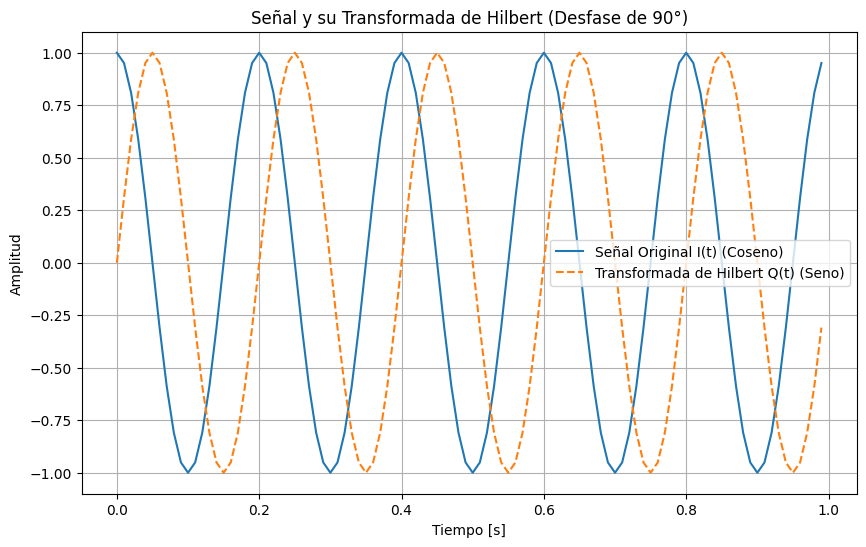

In [ ]:
from scipy.signal import hilbert

# Parámetros
fs = 100
t = np.arange(0, 1, 1/fs)

# Señal en fase (I)
signal_I = np.cos(2 * np.pi * 5 * t)

# Calcular la señal analítica y obtener la componente en cuadratura (Q)
analytic_signal = hilbert(signal_I)
signal_Q = np.imag(analytic_signal)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t, signal_I, label='Señal Original I(t) (Coseno)')
plt.plot(t, signal_Q, label='Transformada de Hilbert Q(t) (Seno)', linestyle='--')
plt.title("Señal y su Transformada de Hilbert (Desfase de 90°)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

#### **Simulaciones**
---

In [5]:
# Importa la función para la Transformada de Hilbert
from scipy.signal import hilbert

# Define la función para simular la extracción de la envolvente
def simulate_hilbert_envelope(f_moduladora=3.0, prof_modulacion=0.7):
    # Define la frecuencia de muestreo
    fs = 1000
    # Crea el vector de tiempo
    t = np.arange(0, 2, 1/fs)
    # Frecuencia de la onda portadora
    f_portadora = 50

    # Genera la señal de información (la envolvente)
    envolvente_real = 1 + prof_modulacion * np.cos(2 * np.pi * f_moduladora * t)
    # Crea la señal de Amplitud Modulada (AM)
    signal_am = envolvente_real * np.cos(2 * np.pi * f_portadora * t)

    # Calcula la señal analítica y extrae su magnitud (la envolvente)
    envolvente_detectada = np.abs(hilbert(signal_am))

    # Configura el tamaño del gráfico
    plt.figure(figsize=(12, 6))
    # Dibuja la señal AM original
    plt.plot(t, signal_am, label='Señal AM')
    # Dibuja la envolvente detectada para compararla
    plt.plot(t, envolvente_detectada, label='Envolvente Detectada', color='r', linestyle='--', linewidth=2)
    # Añade un título al gráfico
    plt.title("Extracción de Envolvente con Transformada de Hilbert")
    # Etiqueta el eje X
    plt.xlabel("Tiempo (s)")
    # Etiqueta el eje Y
    plt.ylabel("Amplitud")
    # Muestra la leyenda del gráfico
    plt.legend()
    # Activa la cuadrícula
    plt.grid(True)
    # Muestra el gráfico
    plt.show()

# Crea el widget interactivo
interactive_plot = interactive(simulate_hilbert_envelope,
                               # Deslizador para la frecuencia de la información (envolvente)
                               f_moduladora=widgets.FloatSlider(min=1.0, max=10.0, step=0.5, value=3.0, description='Frec. Info:'),
                               # Deslizador para la profundidad de la modulación
                               prof_modulacion=widgets.FloatSlider(min=0.1, max=1.0, step=0.1, value=0.7, description='Prof. Mod:'))
# Muestra los controles interactivos
display(interactive_plot)

interactive(children=(FloatSlider(value=3.0, description='Frec. Info:', max=10.0, min=1.0, step=0.5), FloatSli…

## **4. Señales I/Q y Modulación QAM**

La **Modulación de Amplitud en Cuadratura (QAM)** es una técnica de modulación avanzada que permite transmitir **dos señales de datos independientes** sobre una única frecuencia portadora. Para ello, utiliza dos portadoras de la misma frecuencia pero desfasadas 90° entre sí: la portadora **en fase (I)** y la portadora **en cuadratura (Q)**.

#### **Modelo Matemático**

1.  **Generación de Señales I/Q:** A partir de un flujo de bits, se generan dos señales de amplitud variable, $I(t)$ y $Q(t)$. En la modulación digital como 16-QAM, estas señales toman niveles de voltaje discretos que corresponden a grupos de bits.
2.  **Modulación:** La señal I modula a una portadora coseno y la señal Q modula a una portadora seno (que es un coseno desfasado -90°). Luego se suman.
    $$
    s(t) = I(t) \cos(2\pi f_c t) - Q(t) \sin(2\pi f_c t)
    $$
    Donde:
    * $s(t)$ es la señal QAM final transmitida.
    * $f_c$ es la frecuencia de la portadora.
    * $I(t)$ es la señal de datos en fase.
    * $Q(t)$ es la señal de datos en cuadratura.

3.  **Diagrama de Constelación:** Es la forma de visualizar una señal QAM. Representa los posibles estados (puntos) que la señal puede tomar en un plano complejo, donde el eje horizontal es I y el vertical es Q. Cada punto corresponde a una combinación única de bits. Por ejemplo, **16-QAM** tiene 16 puntos, y cada punto representa 4 bits ($\log_2 16 = 4$)**(Sklar & Ray, 2017)**.

#### **Usos Principales**
* **Alta Eficiencia Espectral:** QAM permite empaquetar más bits por símbolo (más bits/Hz) que modulaciones más simples, lo que es crucial para alcanzar las altas velocidades de WiFi y 5G.
* **Comunicaciones Digitales Modernas:** Es el esquema de modulación estándar en DSL, cablemódems, WiFi 5/6 y 5G. Órdenes de QAM más altos (ej. 256-QAM, 1024-QAM) ofrecen velocidades de datos más altas, pero requieren una mejor relación señal/ruido (SNR).

---
#### **Gráficos**

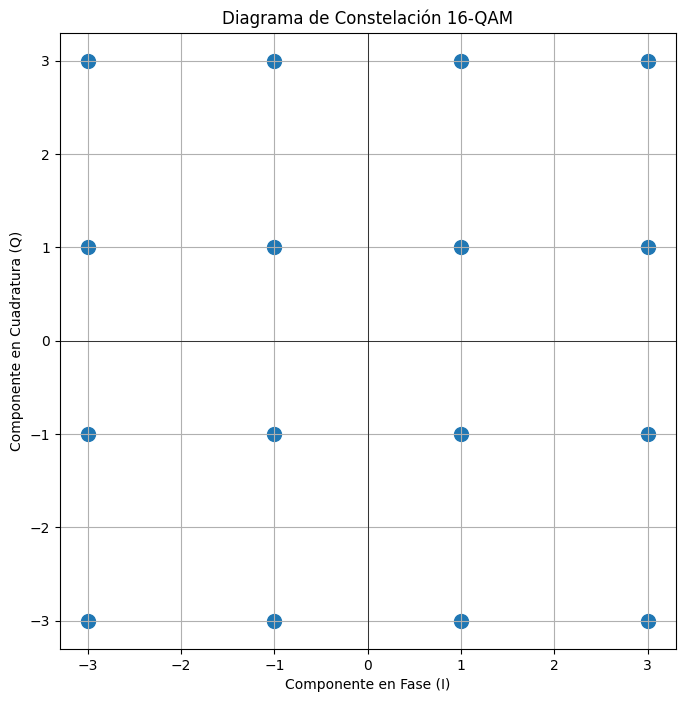

In [ ]:
# Puntos de la constelación 16-QAM
amplitudes = np.array([-3, -1, 1, 3])
I_points, Q_points = np.meshgrid(amplitudes, amplitudes)
constellation_points = I_points.flatten() + 1j * Q_points.flatten()

# Graficar
plt.figure(figsize=(8, 8))
plt.scatter(np.real(constellation_points), np.imag(constellation_points), marker='o', s=100)
plt.title("Diagrama de Constelación 16-QAM")
plt.xlabel("Componente en Fase (I)")
plt.ylabel("Componente en Cuadratura (Q)")
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### **Simulaciones**
---

In [6]:
# Define la función de simulación que depende de una cadena de bits
def simulate_qam_text(bits='1101100101100011'):
    # Valida que la entrada sea una cadena de bits válida (longitud múltiplo de 4)
    if len(bits) % 4 != 0 or not all(c in '01' for c in bits):
        # Muestra un mensaje de error si la entrada no es válida
        print("Por favor, introduce una cadena de bits válida (longitud múltiplo de 4).")
        # Termina la función si hay un error
        return

    # Diccionario que mapea grupos de 4 bits a símbolos complejos (constelación 16-QAM)
    qam_map = {'0000':-3+3j,'0001':-1+3j,'0010':1+3j,'0011':3+3j,'0100':-3+1j,'0101':-1+1j,'0110':1+1j,'0111':3+1j,
               '1000':-3-1j,'1001':-1-1j,'1010':1-1j,'1011':3-1j,'1100':-3-3j,'1101':-1-3j,'1110':1-3j,'1111':3-3j}

    # Convierte la cadena de bits en una lista de símbolos complejos
    simbolos = [qam_map[bits[i:i+4]] for i in range(0, len(bits), 4)]

    # Define los parámetros para la modulación (frecuencia, muestreo, etc.)
    f_carrier = 10; fs = 500; t_simbolo = 1.0/f_carrier * 4
    # Crea el vector de tiempo total para la simulación
    t = np.arange(0, len(simbolos) * t_simbolo, 1/fs)
    # Inicializa los arrays para las señales I, Q y la señal modulada final
    signal_modulada = np.zeros_like(t); I_signal = np.zeros_like(t); Q_signal = np.zeros_like(t)

    # Itera sobre cada símbolo para generar la señal modulada
    for i, s in enumerate(simbolos):
        # Calcula el intervalo de tiempo para el símbolo actual
        start, end = int(i*t_simbolo*fs), int((i+1)*t_simbolo*fs)
        # Extrae las componentes I (real) y Q (imaginaria) del símbolo
        I_signal[start:end], Q_signal[start:end] = np.real(s), np.imag(s)
        # Modula las componentes I y Q con portadoras en cuadratura (coseno y seno)
        signal_modulada[start:end] = np.real(s)*np.cos(2*np.pi*f_carrier*t[start:end]) - np.imag(s)*np.sin(2*np.pi*f_carrier*t[start:end])

    # Configura la figura para el gráfico
    plt.figure(figsize=(15, 8))
    # Dibuja las señales I y Q en el primer subgráfico
    plt.subplot(2,1,1); plt.plot(t, I_signal, label='I(t)'); plt.plot(t, Q_signal, label='Q(t)'); plt.title("Señales I/Q"); plt.legend(); plt.grid()
    # Dibuja la señal 16-QAM final en el segundo subgráfico
    plt.subplot(2,1,2); plt.plot(t, signal_modulada); plt.title("Señal 16-QAM Modulada"); plt.xlabel("Tiempo (s)"); plt.grid()
    # Ajusta el diseño y muestra los gráficos
    plt.tight_layout(); plt.show()

# Crea el widget interactivo
interactive_plot = interactive(simulate_qam_text, bits=widgets.Text(value='1101100101100011', description='Bits:'))
# Muestra el control interactivo
display(interactive_plot)

interactive(children=(Text(value='1101100101100011', description='Bits:'), Output()), _dom_classes=('widget-in…

## **5. OFDM (Multiplexación por División de Frecuencias Ortogonales)**

OFDM es una técnica de modulación digital que divide un canal de alta velocidad en un gran número de **subcanales o subportadoras** más lentos y ortogonales entre sí. En lugar de enviar un solo flujo de datos rápido y propenso a errores, envía miles de flujos de datos lentos en paralelo.

La **ortogonalidad** significa que las subportadoras están espaciadas de tal manera que el pico de una coincide con los ceros de las demás, lo que permite empaquetarlas muy juntas sin que interfieran entre sí, logrando una gran eficiencia espectral.

#### **Modelo Matemático**

Una señal OFDM se genera sumando las señales de todas las subportadoras. Para $N$ subportadoras, la señal en el dominio del tiempo es:
$$x(t) = \sum_{k=0}^{N-1} d_k e^{j2\pi(f_c + k\Delta f)t}$$
Donde:
* $d_k$ es el símbolo de datos (ej. un valor QAM) que se transmite en la k-ésima subportadora.
* $f_c$ es la frecuencia de la primera subportadora.
* $\Delta f$ es el espaciado entre subportadoras, que se elige para garantizar la ortogonalidad (típicamente $1/T_s$, donde $T_s$ es la duración del símbolo).

Curiosamente, esta suma es matemáticamente idéntica a la **Transformada Inversa de Fourier Discreta (IDFT)**. Por lo tanto, en la práctica, los transmisores OFDM usan el algoritmo **IFFT** (la versión rápida de la IDFT) para generar la señal de manera muy eficiente, y los receptores usan la **FFT** para demodularla.

#### **Usos Principales**
* **Robustez contra el "Multipath":** Es su principal ventaja. En entornos inalámbricos, las señales rebotan y llegan al receptor por múltiples caminos, causando interferencia. OFDM convierte un canal de banda ancha susceptible a esto en muchos canales de banda estrecha que son mucho más resistentes **(Goldsmith, 2005)**.
* **Estándar en Comunicaciones Modernas:** Es la base de WiFi (802.11a/g/n/ac/ax) y 4G/5G.

---
#### **Gráficos**

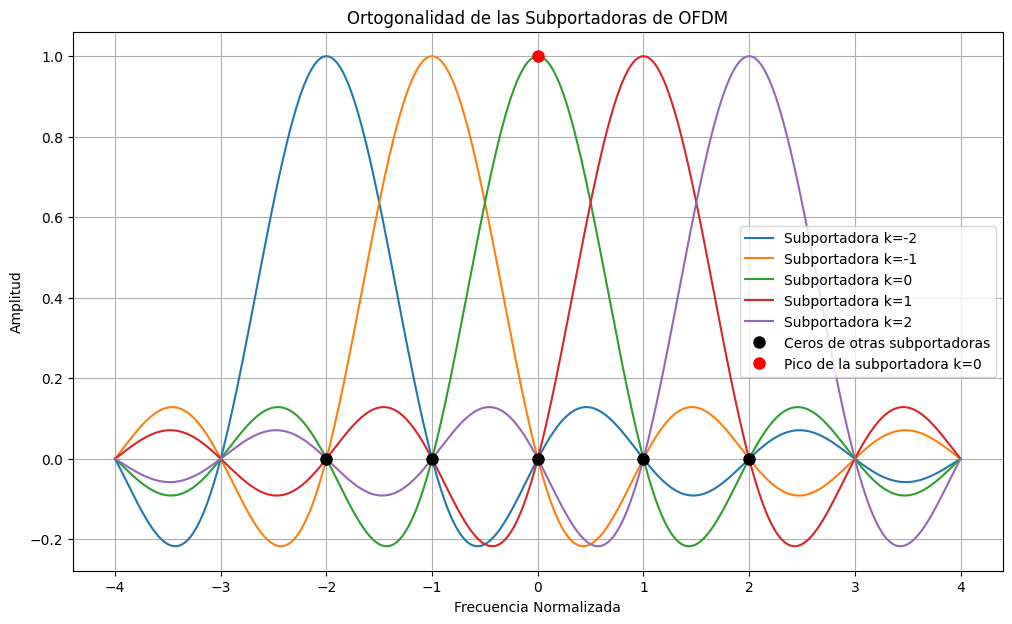

In [ ]:
# Frecuencias normalizadas
f = np.linspace(-4, 4, 1000)

plt.figure(figsize=(12, 7))

# Graficar varias subportadoras (funciones sinc)
for k in range(-2, 3):
    sinc_k = np.sinc(f - k)
    plt.plot(f, sinc_k, label=f'Subportadora k={k}')

# Marcar los picos y los ceros para ilustrar la ortogonalidad
zeros = np.arange(-2, 3)
plt.plot(zeros, np.zeros_like(zeros), 'ko', markersize=8, label='Ceros de otras subportadoras')
plt.plot(0, 1, 'ro', markersize=8, label='Pico de la subportadora k=0')


plt.title("Ortogonalidad de las Subportadoras de OFDM")
plt.xlabel("Frecuencia Normalizada")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

#### **Simulaciones**
---

In [7]:
# Define la función para la simulación de un símbolo OFDM
def simulate_ofdm_gen(n_datos=26):
    # Número total de subportadoras (tamaño de la IFFT)
    N_subportadoras = 64
    # Define los índices de las subportadoras que llevarán datos
    subportadoras_datos = np.arange(1, n_datos + 1)

    # Genera símbolos de datos aleatorios (QPSK en este caso)
    datos = np.random.choice([1+1j, 1-1j, -1+1j, -1-1j], len(subportadoras_datos))
    # Crea el vector de frecuencia, inicialmente vacío
    simbolo_freq = np.zeros(N_subportadoras, dtype=complex)
    # Asigna los símbolos de datos a sus subportadoras
    simbolo_freq[subportadoras_datos] = datos

    # Modula los datos usando la IFFT para obtener la señal en el tiempo
    simbolo_tiempo = np.fft.ifft(simbolo_freq)

    # Configura la figura para el gráfico
    plt.figure(figsize=(14, 6))
    # Dibuja los datos en el dominio de la frecuencia
    plt.subplot(1, 2, 1); plt.stem(np.abs(simbolo_freq)); plt.title("Datos en Frecuencia"); plt.xlabel("Subportadora"); plt.grid(True)
    # Dibuja el símbolo OFDM resultante en el dominio del tiempo
    plt.subplot(1, 2, 2); plt.plot(np.real(simbolo_tiempo)); plt.title("Símbolo OFDM en Tiempo"); plt.xlabel("Muestra"); plt.grid(True)
    # Ajusta el diseño y muestra los gráficos
    plt.tight_layout(); plt.show()

# Crea el widget interactivo
interactive_plot = interactive(simulate_ofdm_gen, n_datos=widgets.IntSlider(min=1, max=31, step=1, value=26, description='# Subportadoras:'))
# Muestra el control interactivo
display(interactive_plot)

interactive(children=(IntSlider(value=26, description='# Subportadoras:', max=31, min=1), Output()), _dom_clas…

## **6. Principios de Comunicación WiFi y 5G**

WiFi y 5G son sistemas de comunicación que integran todos los conceptos anteriores para lograr una transmisión de datos inalámbrica, rápida y fiable.

* **WiFi (IEEE 802.11):** Es un estándar para redes de área local inalámbricas (WLAN). Las versiones modernas (WiFi 5/6/7) usan **OFDM** para combatir el multipath en interiores y **QAM** de alto orden (hasta 1024-QAM o incluso 4096-QAM) para alcanzar altas velocidades de datos cuando la señal es buena **(IEEE 802.11ax, 2021)**. Utiliza bandas de frecuencia sin licencia (2.4 GHz, 5 GHz, 6 GHz).

* **5G (Quinta Generación):** Es el estándar más reciente de tecnología celular. Al igual que WiFi, su capa física se basa en **OFDM** (específicamente, variantes como CP-OFDM) y **QAM** adaptativa. La principal diferencia radica en su flexibilidad y escala. 5G está diseñado para operar en un rango de frecuencias mucho más amplio (desde sub-1 GHz hasta ondas milimétricas >24 GHz) y para soportar tres casos de uso principales:
    1.  **Banda ancha móvil mejorada (eMBB):** Velocidades de descarga masivas para el consumidor (aquí se usan OFDM y QAM de alto orden).
    2.  **Comunicaciones de baja latencia ultra fiables (URLLC):** Para aplicaciones críticas como coches autónomos.
    3.  **Comunicaciones masivas tipo máquina (mMTC):** Para conectar miles de millones de dispositivos IoT de bajo consumo.

La relación entre los conceptos es directa: un teléfono 5G o un portátil con WiFi recibe una señal, utiliza **filtros digitales** para seleccionar su canal, aplica un **FFT** para separar las miles de subportadoras **OFDM**, y luego decodifica los símbolos **QAM** de cada subportadora para reconstruir los bits de datos originales. La generación de estas señales QAM en el transmisor requirió el uso de **componentes I/Q**, que se pueden derivar mediante la **Transformada de Hilbert**.

---
#### **Gráficos**

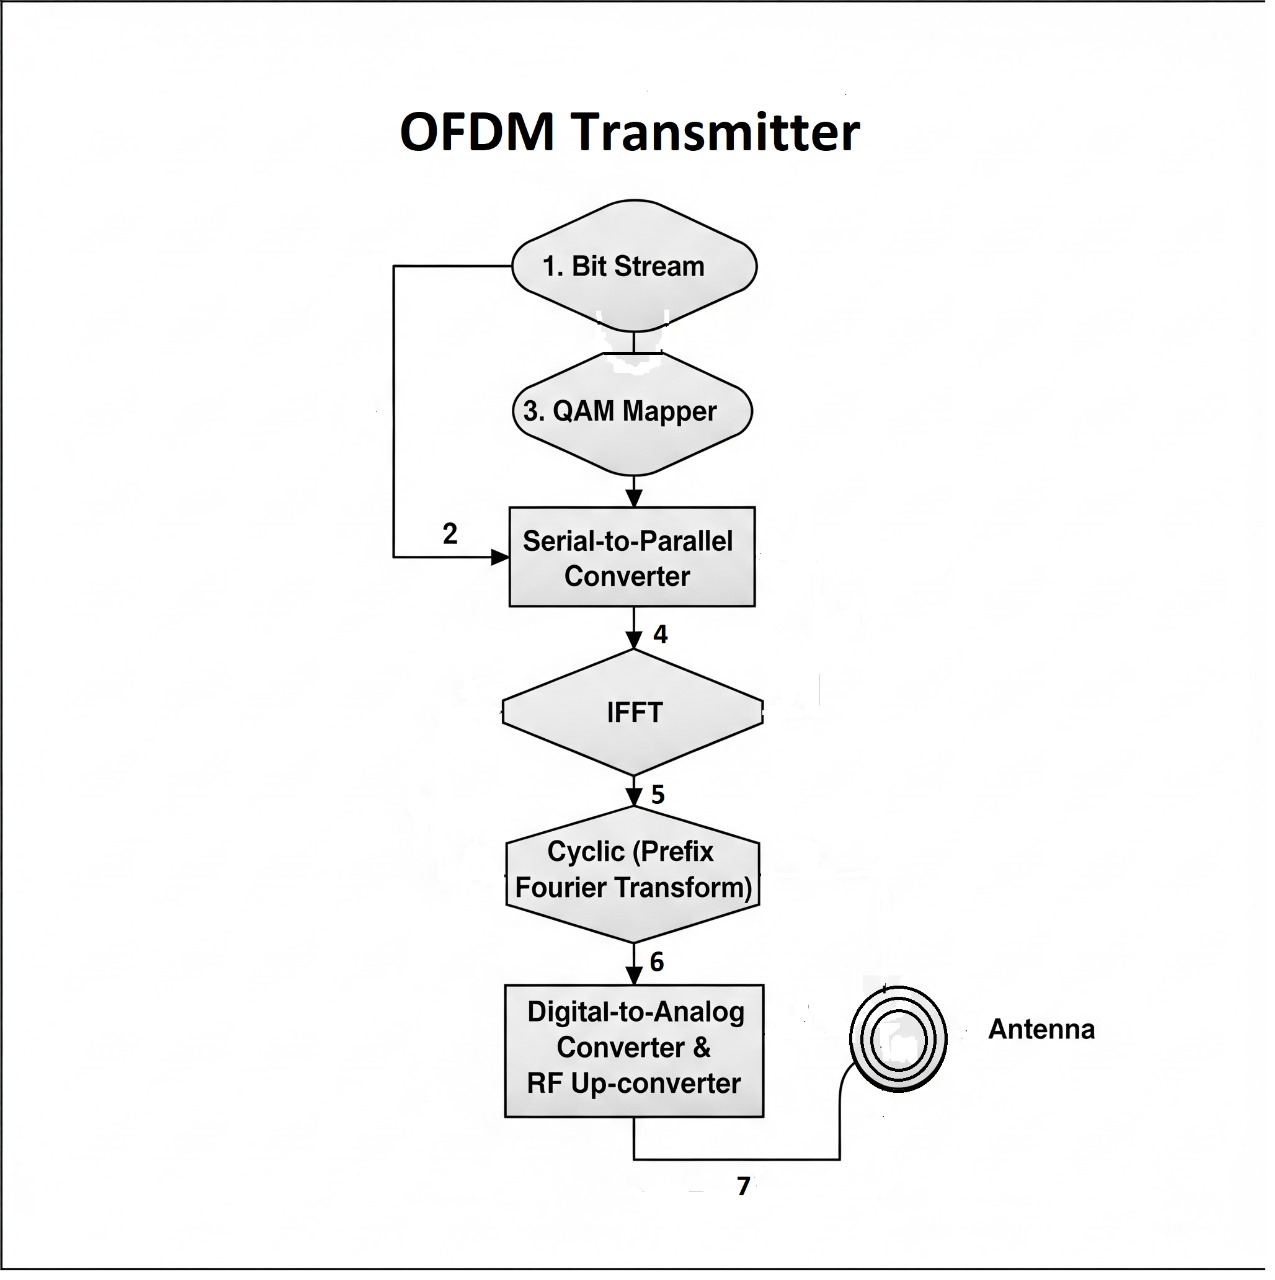

#### **Simulaciones**
---

In [10]:
# Define la función que simula la cadena de comunicación completa
def simulate_chain(snr_db=15.0):
    # Número de subportadoras OFDM
    N_subportadoras = 64
    # Genera un flujo de bits aleatorios para transmitir
    bits = np.random.randint(0, 2, N_subportadoras * 4)
    # Define los niveles de amplitud para la constelación 16-QAM
    amp = [-3, -1, 1, 3]
    # Crea los 16 puntos complejos de la constelación
    qam_points = np.array([a+b*1j for b in amp for a in amp])
    # Mapea los bits a símbolos 16-QAM
    simbolos_tx = np.array([qam_points[bits[i]*8 + bits[i+1]*4 + bits[i+2]*2 + bits[i+3]] for i in range(0, len(bits), 4)])

    # Modula los símbolos con OFDM (usando IFFT)
    signal_tx_ofdm = np.fft.ifft(simbolos_tx)

    # Calcula la potencia promedio de la señal transmitida
    potencia_senal = np.mean(np.abs(signal_tx_ofdm)**2)
    # Calcula la potencia del ruido según el SNR deseado
    potencia_ruido = potencia_senal / (10**(snr_db / 10))
    # Genera ruido gaussiano complejo con la potencia calculada
    ruido = np.sqrt(potencia_ruido/2) * (np.random.randn(len(signal_tx_ofdm)) + 1j*np.random.randn(len(signal_tx_ofdm)))
    # Simula el canal de comunicación añadiendo el ruido a la señal
    signal_rx_ofdm = signal_tx_ofdm + ruido

    # Demodula la señal recibida con OFDM (usando FFT)
    simbolos_rx = np.fft.fft(signal_rx_ofdm)

    # Configura la figura para el gráfico
    plt.figure(figsize=(8, 8))
    # Dibuja la constelación original transmitida (TX)
    plt.scatter(np.real(simbolos_tx), np.imag(simbolos_tx), marker='x', color='red', s=100, label='Original (TX)')
    # Dibuja la constelación recibida con ruido (RX)
    plt.scatter(np.real(simbolos_rx), np.imag(simbolos_rx), marker='o', alpha=0.6, label='Recibida (RX)')
    # Añade título, etiquetas y leyenda
    plt.title(f"Constelación Recibida (SNR = {snr_db:.1f} dB)")
    plt.xlabel("En Fase (I)"); plt.ylabel("Cuadratura (Q)"); plt.legend(); plt.grid(True)
    # Configura los ejes y la cuadrícula
    plt.axhline(0, color='black', lw=0.5); plt.axvline(0, color='black', lw=0.5)
    plt.gca().set_aspect('equal', adjustable='box'); plt.show()

# Crea el widget interactivo
interactive_plot = interactive(simulate_chain, snr_db=widgets.FloatSlider(min=0, max=30, step=0.5, value=15, description='SNR (dB):'))
# Muestra el control interactivo
display(interactive_plot)

interactive(children=(FloatSlider(value=15.0, description='SNR (dB):', max=30.0, step=0.5), Output()), _dom_cl…

## **Referencias**

* **3GPP TS 38.211.** *Physical channels and modulation*. 3rd Generation Partnership Project; Technical Specification Group Radio Access Network.
* **Goldsmith, A. (2005).** *Wireless Communications*. Cambridge University Press.
* **IEEE 802.11ax-2021.** *IEEE Standard for Information Technology... Part 11: Wireless LAN Medium Access Control (MAC) and Physical Layer (PHY) Specifications, Amendment 1: Enhancements for High-Efficiency WLAN*.
* **Oppenheim, A. V., & Schafer, R. W. (2009).** *Discrete-Time Signal Processing*. Pearson.
* **Proakis, J. G., & Manolakis, D. G. (2007).** *Digital Signal Processing: Principles, Algorithms, and Applications*. Pearson Prentice Hall.
* **Sklar, B., & Ray, P. K. (2017).** *Digital Communications: Fundamentals and Applications*. Pearson.